## To predict the category of people who might be interested to purchase the newly launched suv in the market Using Logistic Regression

### import necessary library

In [52]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

### Load and review the dataset

In [53]:
df=pd.read_csv('suv_data.csv')

In [54]:
df.head()
#print first five rows

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [55]:
df.shape
#get the shape

(400, 5)

In [56]:
df.info()
#get the info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [57]:
df.dtypes
#get the datatypes of the columns

User ID             int64
Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

In [58]:
df.describe(include="all")
#description about the columns

,User ID,Gender,Age,EstimatedSalary,Purchased
count,4.000000e+02,400,400.000000,400.000000,400.000000
unique,NaN,2,NaN,NaN,NaN
top,NaN,Female,NaN,NaN,NaN
freq,NaN,204,NaN,NaN,NaN
mean,1.569154e+07,NaN,37.655000,69742.500000,0.357500
std,7.165832e+04,NaN,10.482877,34096.960282,0.479864
min,1.556669e+07,NaN,18.000000,15000.000000,0.000000
25%,1.562676e+07,NaN,29.750000,43000.000000,0.000000
50%,1.569434e+07,NaN,37.000000,70000.000000,0.000000
75%,1.575036e+07,NaN,46.000000,88000.000000,1.000000


<AxesSubplot:xlabel='Purchased', ylabel='count'>

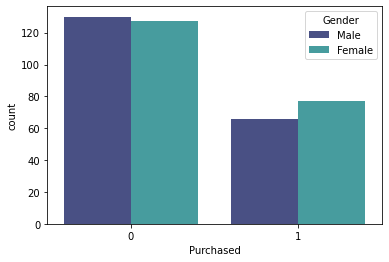

In [59]:
sns.countplot(x="Purchased",hue="Gender",data=df,palette="mako")


<AxesSubplot:xlabel='Age', ylabel='EstimatedSalary'>

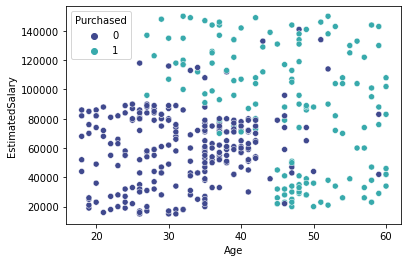

In [64]:
sns.scatterplot(data=df,x="Age",y="EstimatedSalary",hue="Purchased",palette="mako")

In [60]:
df_g=pd.get_dummies(df["Gender"])
df_g.head()
#one hot encoding

,Female,Male
0,0,1
1,0,1
2,1,0
3,1,0
4,0,1


In [61]:
df=pd.concat([df,df_g],axis=1)
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased,Female,Male
0,15624510,Male,19,19000,0,0,1
1,15810944,Male,35,20000,0,0,1
2,15668575,Female,26,43000,0,1,0
3,15603246,Female,27,57000,0,1,0
4,15804002,Male,19,76000,0,0,1


In [62]:
df.drop(["Gender"],axis=1,inplace=True)

In [63]:
df.head()

,User ID,Age,EstimatedSalary,Purchased,Female,Male
0,15624510,19,19000,0,0,1
1,15810944,35,20000,0,0,1
2,15668575,26,43000,0,1,0
3,15603246,27,57000,0,1,0
4,15804002,19,76000,0,0,1


In [68]:
df.corr()
#get the correlation

,User ID,Age,EstimatedSalary,Purchased,Female,Male
User ID,1.000000,-0.000721,0.071097,0.007120,0.025249,-0.025249
Age,-0.000721,1.000000,0.155238,0.622454,0.073741,-0.073741
EstimatedSalary,0.071097,0.155238,1.000000,0.362083,0.060435,-0.060435
Purchased,0.007120,0.622454,0.362083,1.000000,0.042469,-0.042469
Female,0.025249,0.073741,0.060435,0.042469,1.000000,-1.000000
Male,-0.025249,-0.073741,-0.060435,-0.042469,-1.000000,1.000000


### Build  the model

In [69]:
X=df.drop("Purchased",axis=1)
y=df["Purchased"]

In [70]:
#split the data into train and testing
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.30, random_state=42)

In [71]:
#standard scaling
from sklearn.preprocessing import StandardScaler    
s_x= StandardScaler()    
X_train= s_x.fit_transform(X_train)    
X_test= s_x.transform(X_test)

In [72]:
from sklearn.linear_model import LogisticRegression  
classifier= LogisticRegression(random_state=2)  
classifier.fit(X_train, y_train)

LogisticRegression(random_state=2)

In [87]:
model=LogisticRegression()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.8583333333333333

In [74]:
y_pred = classifier.predict(X_test)

In [75]:
y_pred

array([0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0], dtype=int64)

In [76]:
from sklearn.metrics import accuracy_score
print ("Accuracy : ", accuracy_score(y_test, y_pred))

Accuracy :  0.8583333333333333


In [77]:
from sklearn import metrics

In [78]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[71,  2],
       [15, 32]], dtype=int64)

In [79]:
#Out of 120 Entries:

#TruePostive = 71

#TrueNegative = 32

#FalsePositive = 15

#FalseNegative = 2

<AxesSubplot:>

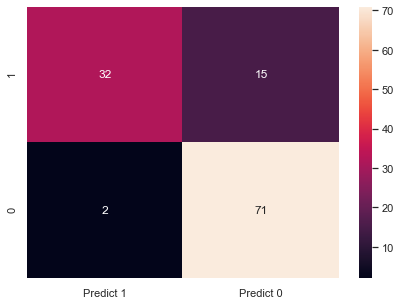

In [80]:
cm=metrics.confusion_matrix(y_test,y_pred, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm,annot=True,fmt='g')

In [81]:
## Minmax scaler

In [82]:
from sklearn.preprocessing import MinMaxScaler    
mm_x= MinMaxScaler()    
X1_train= mm_x.fit_transform(X_train)    
X1_test= mm_x.transform(X_test)

In [83]:
from sklearn.linear_model import LogisticRegression  
classifier= LogisticRegression(random_state=2)  
classifier.fit(X1_train, y_train)

LogisticRegression(random_state=2)

In [89]:
model_1=LogisticRegression()
model_1.fit(X1_train,y_train)
model_1.score(X1_test,y_test)

0.8333333333333334

In [85]:
y1_pred = classifier.predict(X1_test)

In [86]:
y1_pred

array([0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0], dtype=int64)

<AxesSubplot:>

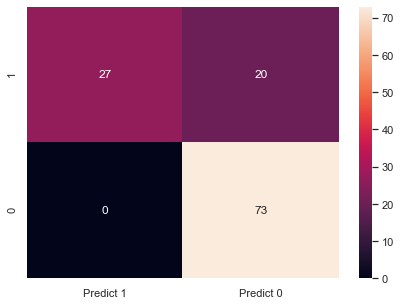

In [94]:
cm=metrics.confusion_matrix(y_test,y1_pred, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm,annot=True,fmt='g')

In [ ]:
#Standard Scalar provides more accuracy than MinMax scalar technique

In [92]:
print ("Accuracy : ", accuracy_score(y_test, y1_pred))

Accuracy :  0.8333333333333334


In [93]:
from sklearn.metrics import f1_score
print("f1 score for base model is : " , f1_score(y_test,y_pred))

f1 score for base model is :  0.7901234567901235


#### Inference:
##### Standard Scalar provides more accuracy than MinMax scalar technique.
##### THE TRUE POSITIVE AND TRUE NEGATIVE IS GREATER THAN THE OTHER TWO WHILE USING STANDARD SCALING TECHNIQUE AND THIS MODEL IS CONSIDERED TO BE A GOOD MODEL.